In [2]:
import matplotlib
import pandas as pd
import numpy as np
import numpy.linalg as LA
from scipy import stats
import math
import numpy.ma as ma
import matplotlib.pyplot as plt
import numpy.ma as ma
from pathlib import Path
import sys
import qualities
import plotting_func
import glob

In [3]:
files = glob.glob(str(sys.path[0][0:-7])+"/outputs/*")
print(files)
#print(len(files))

model  = 'NATST' #NATST, NATSS
datasets = ['cifar10','cifar100']

file12 = {}
file90 = {}
results12 = {}
results90 = {}
sorted_dict12 = {}
sorted_dict90 = {}
plot12 = {}
plot90 = {}
title = {}

for dataset in datasets:
    for x in files:
        if(dataset + "-" in x and model in x and "-12.csv" in x):
            file12[dataset] = x
            print(x)
        if(dataset + "-" in x and model in x and "-200.csv" in x):
            file90[dataset] = x
            print(x)

    
    results12[dataset] = qualities.correlate(file12[dataset].split(os.sep)[-1][0:-4])
    sorted_dict12[dataset] = results12[dataset]["pearson"]
    

    results90[dataset] = qualities.correlate(file90[dataset].split(os.sep)[-1][0:-4])
    sorted_dict90[dataset] = results90[dataset]["pearson"]

    '''
    after_process = ["0", "1", "2", "3", "4", "5", "6", "7"]
    sorted_dict12[dataset], title[dataset] = plotting_func.rename_dict(sorted_dict12[dataset], after_process[6], "gap") #"test", "gap"
    sorted_dict90[dataset], title[dataset] = plotting_func.rename_dict(sorted_dict90[dataset], after_process[6], "gap") #"test", "gap"

    #Remove all agg methods except L2 and L3
    plot12[dataset] = {}
    plot90[dataset] = {}
    for x in sorted_dict90[dataset].keys():
        if("L2" in x or "L3" in x):
            plot12[dataset][x] = sorted_dict12[dataset][x]
            plot90[dataset][x] = sorted_dict90[dataset][x]
    '''

['c:\\Users\\jjaeg\\Desktop\\QC-Bench/outputs\\results-06-17-2021_14-31-15-NATST-cifar10-200.csv', 'c:\\Users\\jjaeg\\Desktop\\QC-Bench/outputs\\results-06-17-2021_14-34-36-NATST-cifar10-12.csv', 'c:\\Users\\jjaeg\\Desktop\\QC-Bench/outputs\\results-06-17-2021_14-34-36-NATST-cifar100-200.csv', 'c:\\Users\\jjaeg\\Desktop\\QC-Bench/outputs\\results-06-17-2021_15-19-16-NATST-cifar100-12.csv']
c:\Users\jjaeg\Desktop\QC-Bench/outputs\results-06-17-2021_14-31-15-NATST-cifar10-200.csv
c:\Users\jjaeg\Desktop\QC-Bench/outputs\results-06-17-2021_14-34-36-NATST-cifar10-12.csv
zero models deleted: 342
15283
zero models deleted: 326
15299
c:\Users\jjaeg\Desktop\QC-Bench/outputs\results-06-17-2021_14-34-36-NATST-cifar100-200.csv
c:\Users\jjaeg\Desktop\QC-Bench/outputs\results-06-17-2021_15-19-16-NATST-cifar100-12.csv
zero models deleted: 342
15283
zero models deleted: 9
15617


In [4]:
newgap90 = dict()
newgap12 = dict()
newtest90 = dict()
newtest12 = dict()
for dataset in datasets:
    for x in results90[dataset]["pearson"]:
        if("gap" in x):
            if("QS" in x):
                if("L3" in x and "_0" in x):
                    newgap90[x+"-"+dataset] = results90[dataset]["pearson"][x]
                    newgap12[x+"-"+dataset] = results12[dataset]["pearson"][x]
            elif("path" in x):
                newgap90[x+"-"+dataset] = results90[dataset]["pearson"][x]
                newgap12[x+"-"+dataset] = results12[dataset]["pearson"][x]  
            else:
                if("L2" in x and "_6" in x):
                    newgap90[x+"-"+dataset] = results90[dataset]["pearson"][x]
                    newgap12[x+"-"+dataset] = results12[dataset]["pearson"][x]
        elif("test" in x):
            if("QS" in x):
                if("L3" in x and "_0" in x):
                    newtest90[x+"-"+dataset] = results90[dataset]["pearson"][x]
                    newtest12[x+"-"+dataset] = results12[dataset]["pearson"][x]
            elif("path" in x):
                newtest90[x+"-"+dataset] = results90[dataset]["pearson"][x]
                newtest12[x+"-"+dataset] = results12[dataset]["pearson"][x]  
            else:
                if("L2" in x and "_6" in x):
                    newtest90[x+"-"+dataset] = results90[dataset]["pearson"][x]
                    newtest12[x+"-"+dataset] = results12[dataset]["pearson"][x]

In [5]:
print(newtest12)

{'QS_BE_test_acc_L3_0-cifar10': 0.11750837577038876, 'QS_AE_test_acc_L3_0-cifar10': 0.006726725559588564, 'QE_BE_test_acc_L2_6-cifar10': 0.29718154334743485, 'QE_AE_test_acc_L2_6-cifar10': 0.2569802877336503, 'spec_BE_test_acc_L2_6-cifar10': 0.31814389602945714, 'spec_AE_test_acc_L2_6-cifar10': 0.690035015504125, 'fro_BE_test_acc_L2_6-cifar10': 0.03684037830382447, 'fro_AE_test_acc_L2_6-cifar10': 0.6502269105230772, 'path_test_acc-cifar10': 0.3174825976560249, 'QS_BE_test_acc_L3_0-cifar100': 0.17103673457481847, 'QS_AE_test_acc_L3_0-cifar100': 0.1087073383898634, 'QE_BE_test_acc_L2_6-cifar100': 0.24379825450746, 'QE_AE_test_acc_L2_6-cifar100': 0.39190969183441715, 'spec_BE_test_acc_L2_6-cifar100': 0.49494815184830704, 'spec_AE_test_acc_L2_6-cifar100': 0.5554058627758218, 'fro_BE_test_acc_L2_6-cifar100': 0.23168368134083234, 'fro_AE_test_acc_L2_6-cifar100': 0.5186865468375563, 'path_test_acc-cifar100': 0.14222292453080243}


In [6]:
def rename_dict(sorted_dict):
    #Renames dict to latex

    temp = {}
    for x in sorted_dict.keys():
        #print(x)
        #Translate Name to Latex
        name = '${'
        if('AE' in x):
            name += '\widehat{'
        elif('BE' in x):
            name += '{'
        if('QS' in x):
            name += 'Q}_{SQ}'
        elif('QE' in x):
            name += 'Q}_{E}'
        elif('fro' in x):
            name += 'Q}_{F}'
        elif('spec' in x):
            name += 'Q}_{S}'
        elif('path' in x):
            name += '{Q}_{P}'
        if('L1' in x):
            name += '^{L1}'
        elif('L2' in x):
            name += '^{L2}'
        elif('L3' in x):
            name += '^{p}'
        elif('L4' in x):
            name += '^{L4}'
        elif('L5' in x):
            name += '^{L5}'
        name += '}$'
        name += "-"+(x.split("-")[-1]).upper()
        #print(name)
        temp[name] = sorted_dict[x]

    return temp



In [7]:

newgap12 = rename_dict(newgap12)
newgap90 = rename_dict(newgap90)
newtest12 = rename_dict(newtest12)
newtest90 = rename_dict(newtest90)

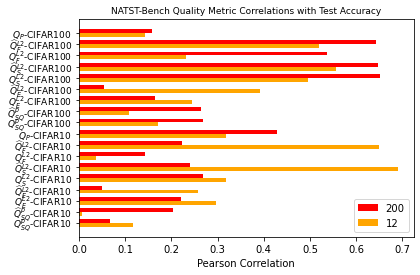

In [12]:
width = 0.35
x = np.arange(len(newtest90.values()))
plt.barh(x + width/2, newtest90.values(), width, label='200', color = "red")
plt.barh(x - width/2, newtest12.values(), width, label='12', color = "orange")
plt.yticks(x, labels = newtest12.keys(), fontsize = 9)
plt.title("NATST-Bench Quality Metric Correlations with Test Accuracy", fontsize = 9)
plt.xlabel('Pearson Correlation')
plt.legend()
plt.show()

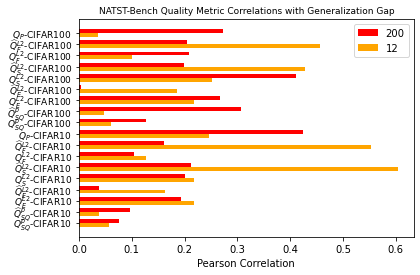

In [13]:
width = 0.35
x = np.arange(len(newgap90.values()))
plt.barh(x + width/2, newgap90.values(), width, label='200', color = "red")
plt.barh(x - width/2, newgap12.values(), width, label='12', color = "orange")
plt.yticks(x, labels = newgap12.keys(), fontsize = 9)
plt.title("NATST-Bench Quality Metric Correlations with Generalization Gap", fontsize = 9)
plt.xlabel('Pearson Correlation')
plt.legend()
plt.show()

In [18]:
for dataset in datasets:    
    x = np.arange(len(plot12[dataset].values()))  # the label locations
    width = 0.35  # the width of the bars
    #print(plot12[dataset])

    #fig, ax = plt.plot()
    plt.barh(x - width/2, plot12[dataset].values(), width, label='12', color = "orange")
    plt.barh(x + width/2, plot90[dataset].values(), width, label='90', color = "red")

    plt.xlabel('Pearson Correlation')
    plt.title(title[dataset], fontsize = 9)
    plt.yticks(x, labels = plot12[dataset].keys(), fontsize = 7)
    plt.legend()

    #fi.tight_layout()
    plt.savefig('figures/' + dataset + 'Gap_6.png', dpi=300)
    plt.show()

KeyError: 'cifar10'

In [3]:
#correlations['pearson'].keys()
sorted_values = sorted(results['pearson'].values()) # Sort the values
sorted_values.reverse()
sorted_dict = {}

for i in sorted_values:
    for k in results['pearson'].keys():
        if results['pearson'][k] == i:
            sorted_dict[k] = abs(results['pearson'][k])

number = 0 
n = '6'
for x in sorted_dict.keys():
    if('_' + n in x):
        number += 1
        #print(x)
print(number)
#print(sorted_dict.keys())

number = 0 
for x in results["pearson"].keys():
    if('_' + n in x):
        number += 1
        #print(x)
print(number)
#print(sorted_dict.keys())

80
80


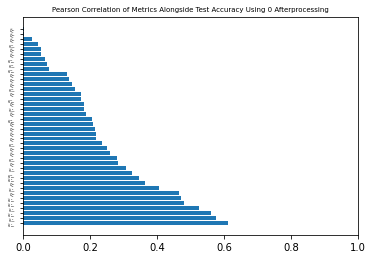

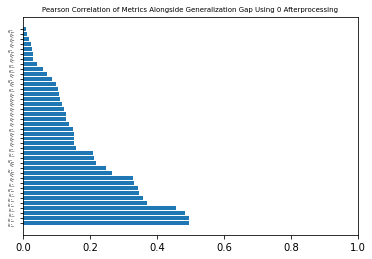

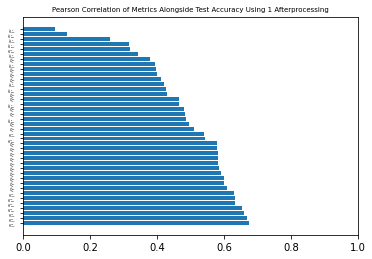

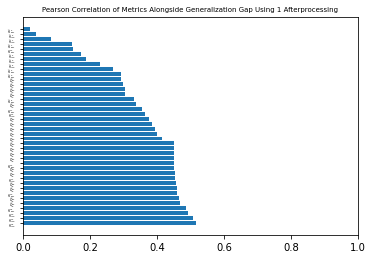

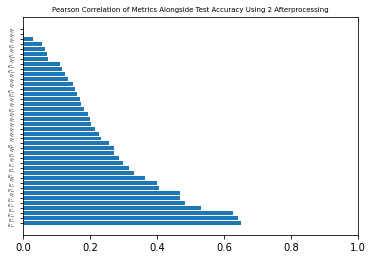

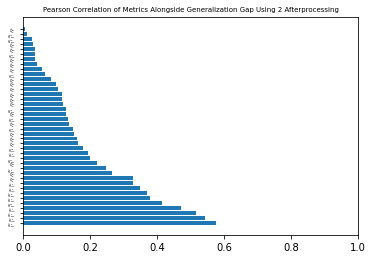

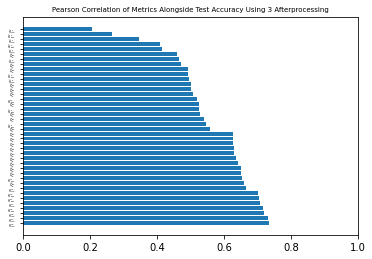

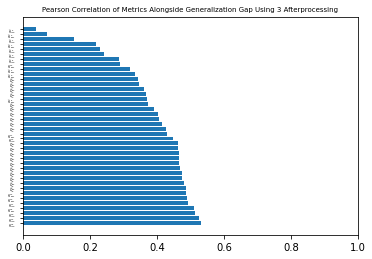

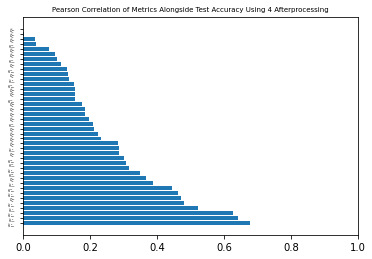

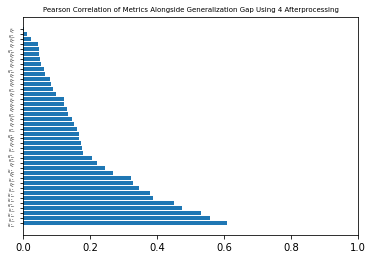

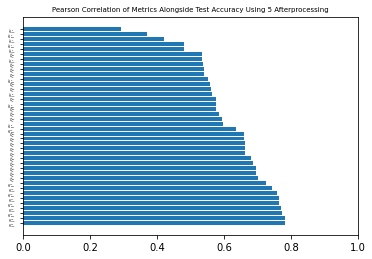

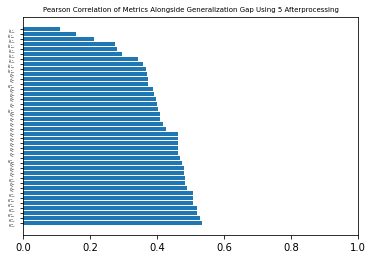

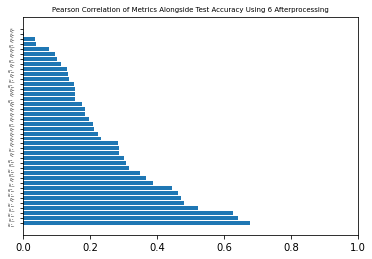

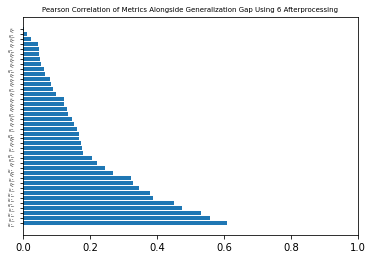

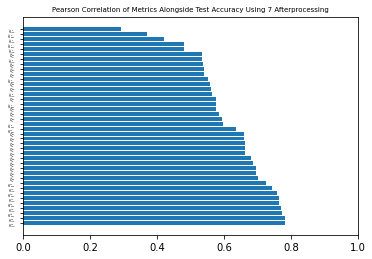

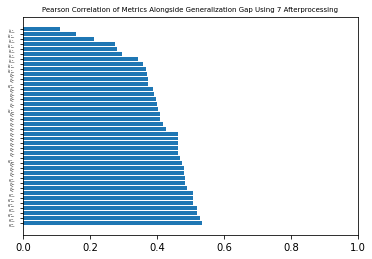

In [4]:
agg = ['L1', 'L2', 'L3', 'L4', 'L5']
aft = ['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7']
vss = ['test', 'gap']

for i in aft:
    for v in vss:
        #Create Temp Dict
        temp = {}
        for x in sorted_dict.keys():
            #print(x)
            if(("_" + i) in x and v in x):
                #Translate Name to Latex
                name = '${'
                if('AE' in x):
                    name += '\widehat{'
                elif('BE' in x):
                    name += '{'
                if('QS' in x):
                    name += 'Q}_{S}'
                elif('QE' in x):
                    name += 'Q}_{E}'
                elif('fro' in x):
                    name += '\mu}_{frob}'
                elif('spec' in x):
                    name += '\mu}_{spec}'
                if('L1' in x):
                    name += '^{L1}'
                elif('L2' in x):
                    name += '^{L2}'
                elif('L3' in x):
                    name += '^{L3}'
                elif('L4' in x):
                    name += '^{L4}'
                elif('L5' in x):
                    name += '^{L5}'

                name += '}$'
                #print(name)
                temp[name] = sorted_dict[x]

            #Create Title:
        if(v == 'test'):
            title = "Pearson Correlation of Metrics Alongside Test Accuracy "
        elif(v == 'gap'):
            title = "Pearson Correlation of Metrics Alongside Generalization Gap "
        title += "Using " + i + " Afterprocessing"

        #Plot
        matplotlib.rc('ytick', labelsize=3)
        matplotlib.rc('xtick', labelsize=10)
        plt.barh(range(len(temp)), list(temp.values()), align='center');
        #print(title, list(temp.keys()), len(list(temp.keys())))
        plt.yticks(range(len(temp)), list(temp.keys()),rotation='horizontal');    
        plt.title(title, fontsize = 7)
        plt.xlim([0,1])
        plt.show()

#Merics_Before/After EVBMF_Test / Gap_L1 to L5 (agg)_ (8 afterprocessing) (Only look at 0 and 7)
#4 x 2 x 5 x 8 = 320.
#Split by aft: 4 x 2 x 5 = 40 bars, 8 graphs

In [48]:
print(sorted_dict.keys())

dict_keys(['fro_BE_test_acc_L1_6', 'fro_BE_test_acc_L1_4', 'QE_BE_test_acc_L2_4', 'QE_BE_test_acc_L2_6', 'fro_BE_test_acc_L2_4', 'fro_BE_test_acc_L2_6', 'fro_BE_test_acc_L1_2', 'fro_BE_test_acc_L2_2', 'QE_BE_test_acc_L2_2', 'fro_BE_test_acc_L2_0', 'fro_BE_test_acc_L1_0', 'QE_BE_test_acc_L1_4', 'QE_BE_test_acc_L1_6', 'QE_BE_test_acc_L2_0', 'QE_BE_test_acc_L1_2', 'QE_BE_test_acc_L1_0', 'QE_BE_test_acc_L3_4', 'QE_BE_test_acc_L3_6', 'QE_BE_test_acc_L2_5', 'QE_BE_test_acc_L2_7', 'QS_BE_test_acc_L3_0', 'QE_BE_test_acc_L1_5', 'QE_BE_test_acc_L1_7', 'QE_BE_test_acc_L2_3', 'QE_BE_test_acc_L3_2', 'QS_BE_test_acc_L3_2', 'fro_BE_test_acc_L3_6', 'fro_BE_test_acc_L3_4', 'QE_BE_test_acc_L1_3', 'fro_BE_test_acc_L1_5', 'fro_BE_test_acc_L1_7', 'QE_BE_test_acc_L2_1', 'fro_BE_test_acc_L1_3', 'QS_BE_test_acc_L3_6', 'QS_BE_test_acc_L3_4', 'fro_BE_test_acc_L3_2', 'QE_BE_test_acc_L3_0', 'QS_BE_test_acc_L3_1', 'fro_BE_test_acc_L1_1', 'QE_BE_test_acc_L1_1', 'fro_BE_test_acc_L3_0', 'QE_BE_test_acc_L3_5', 'QE_BE_